### Computational Guided Inquiry for PChem (Neshyba, 2023)

# Visualizing $U$,  $C_V$, and $\pi_T$.

## Visualizing $U(T,V)$ as a thermodynamic surface

Internal energy is usually written as a function of T and V, designated by the notation $U=U(T,V)$. Conceptually, this energy is very straightforward: it is the sum of the kinetic and potential energies of all molecules in a given sample. Figure 1 below shows $U(T,V)$ of a real gas. You can see some of the behaviors expected of all gases (e.g., increasing $U$ with increasing temperature), and some of the behaviors expected specifically of real gases (see the low-volume part of state space).

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/UVT figure 3.png" height="700" width="700"/>  
<strong>Figure 1</strong>. Thermodynamic surface of the internal energy, $U$, of a gas in a temperature/volume state space.
</p>


## Visualizing $C_V$ and $\pi_T$

Formally, the slope of $U$ in the temperature direction, at constant volume, is written $\big(\frac{\partial U}{\partial T}\big)_V$. This slope has a name, the *constant-volume heat capacity,* and is symbolized $C_V$. So we say

$$
C_V =  \big(\frac{\partial U}{\partial T}\big)_V \ \ \ \ (1)
$$

Similarly, the slope of $U$ in the pressure direction is given a special symbol, $\pi_T$, and name, the *internal pressure* (because it has units pressure) -- which we've encountered before! Formally, we say

$$ 
\pi_T =  \big(\frac{\partial U}{\partial V}\big)_T \ \ \ \ (2)
$$

Getting the thermodynamic surfaces for $C_V(T,V)$ and $\pi_T(T,V)$ numerially should be a cinch for us, once we have $U(T,V)$, using the partial derivative functions dF_dx and dF_dy.


## About units
As previously, the data stored in the files that you'll be picking up in this exercise are almost all SI, with the exception of the energy values stored in Ugrid1.txt, etc., which are stored in $kJ/mol$. For cosmetic purposes, however, it'll be more convenient to do some conversions, for example to use $L$ instead of $m^3$.

There might be a "unit surprise" for you here too: since $\pi_T =  \big(\frac{\partial U}{\partial V}\big)_T$, it must have dimensions energy/volume. That turns out to be a pressure! Here we're converting those quantities into bars (again, for cosmetic reasons).

## Learning Goals
1. Given an image of $U(T,V)$ as a thermodynamic surface, I can predict what $C_V$ and $\pi_T$ will look like as thermodynamic surfaces. 
1. Given a state function (like $U(T,V)$) in gridded form, I can use partial derivative functions dF_dx and dF_dy to compute and display the corresponding partial derivatives ($C_V$ and $\pi_T$). 
1. I can use numpy's *max* and *min* functions to pull out the maximum or minimum value of a set of variables.
1. I can plot multiple surfaces on one graph (using PL.plot_surfaces).

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.append('/home'); import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### Loading and inspecting the data
The cell below loads and plots three internal energy state functions on a $(T,V)$ state space grid. For the most part, the state space is SI (degrees K for temperature, $m^3/mol$ for volume), however the units of $U$ are $kJ/mol$. We're also converting the volumes to Liters for cosmetic purposes.

We're also introducing a new function, PL.plot_surfaces, which allows you to plot multiple surfaces on the same graph.

(50, 50)


<IPython.core.display.Javascript object>


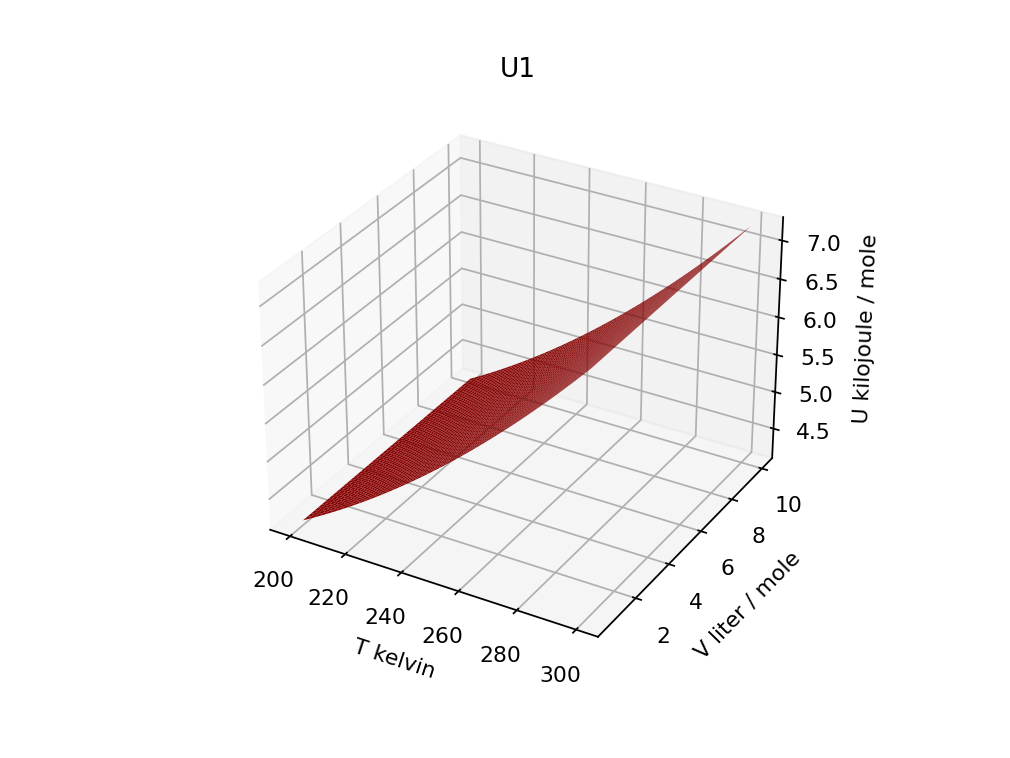

<IPython.core.display.Javascript object>


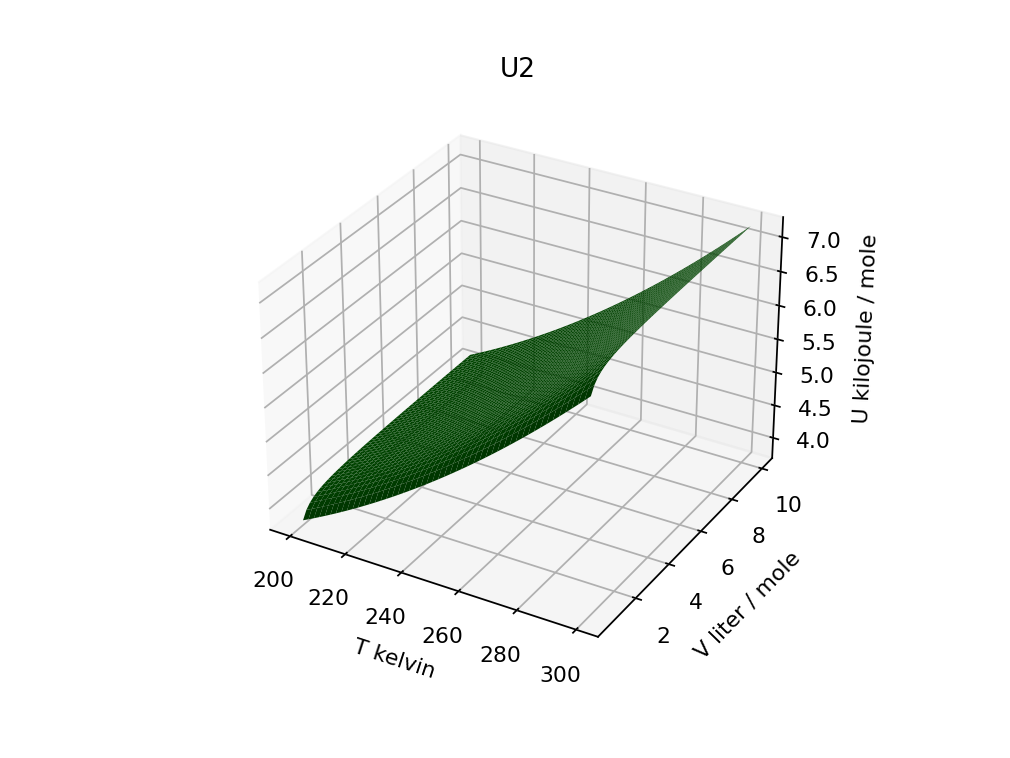

<IPython.core.display.Javascript object>


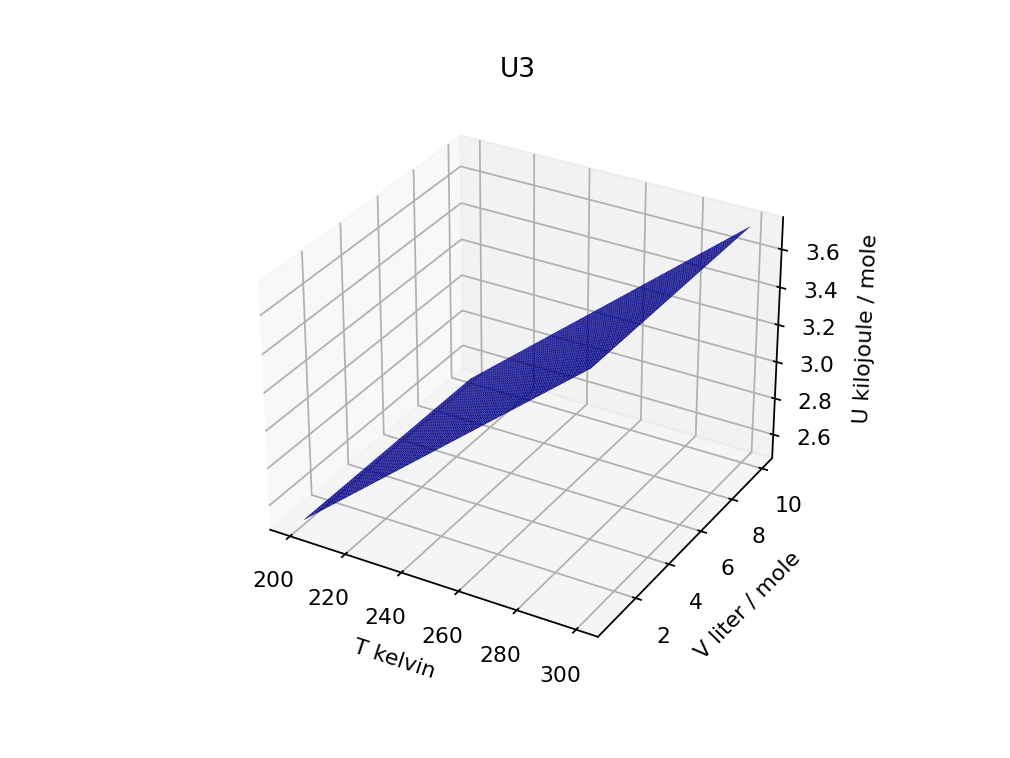

/home/instructor/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:193: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v_numpy = np.array(v)
/home/instructor/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:121: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  np.array(v), kind=kind, force_numeric=force_numeric


/home/instructor/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:193: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.

/home/instructor/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:121: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.



In [3]:
# Loading the thermodynamic state space
Tgrid = np.loadtxt('Tgrid.txt'); Tgrid = AssignQuantity(Tgrid,'K')
Vgrid = np.loadtxt('Vgrid.txt'); Vgrid = AssignQuantity(Vgrid,'m^3/mol'); Vgrid.ito('L/mol')
print(np.shape(Tgrid))

# Loading the three internal energy state functions 
Ugrid1 = np.loadtxt('Ugrid1.txt'); Ugrid1 = AssignQuantity(Ugrid1,'kJ/mol')
Ugrid2 = np.loadtxt('Ugrid2.txt'); Ugrid2 = AssignQuantity(Ugrid2,'kJ/mol')
Ugrid3 = np.loadtxt('Ugrid3.txt'); Ugrid3 = AssignQuantity(Ugrid3,'kJ/mol')
Ulist = [Ugrid1,Ugrid2,Ugrid3]

# Axis labels
xlabel = 'T '+str(Tgrid.units)
ylabel = 'V '+str(Vgrid.units)
zlabel = 'U '+str(Ugrid1.units)
llist = [xlabel, ylabel, zlabel]

# Plotting surface 1
PL.plot_surface1(Tgrid, Vgrid, Ugrid1, color='red',title='U1',labellist=llist)

# Plot surface 2
### BEGIN SOLUTION
PL.plot_surface1(Tgrid, Vgrid, Ugrid2, color='green',title='U2',labellist=llist)
### END SOLUTION

# Plot surface 3
### BEGIN SOLUTION
PL.plot_surface1(Tgrid, Vgrid, Ugrid3, color='blue',title='U3',labellist=llist)
### END SOLUTION

# Labeling lists for multiple surfaces
tlist = ['U1','U2','U3']
clist = ['red','green','blue']

# This plots three surfaces with specified colors
PL.plot_surfaces(Tgrid,Vgrid,Ulist,colorlist=clist).show()

# This plots three surfaces with specified colors, titles, and x-y-z labels
PL.plot_surfaces(Tgrid,Vgrid,Ulist,colorlist=clist,titlelist=tlist,labellist=llist).show()

### Pause for analysis
A couple of features of these three surfaces you might make a note of:

1. The size of the state space grids is 50x50.
1. All three $U(T,V)$ surfaces go up with increasing temperature, although $U_3(T,V)$ does so with a constant slope, while $U_1(T,V)$ and $U_2(T,V)$ do so with some curvature. 

Both these observations will become important later, as you distinguish which $U(T,V)$ surfaces describe real or ideal gases, and which describe monatomic or polyatomic gases.

Now take a close look at the volume dependence of three surfaces: only one is volume-dependent. Which one? 

### BEGIN SOLUTION
$U_2$ is volume-dependent
### END SOLUTION

### Computing $C_V$ as thermodynamic surfaces
In the cell below, we compute the three $C_V$ surfaces corresponding to these three $U(T,V)$ surfaces. We're also using numpy's max function to get a sense of the range of $C_V$ values. That way, if we scale subsequent plots with the same maximum, it'll be easier to compare them.

In [4]:
# Calculate the partial of U with respect to T
Tgridnew, Vgridnew, CV1 = PL.dF_dx([Tgrid,Vgrid],Ugrid1)
Tgridnew, Vgridnew, CV2 = PL.dF_dx([Tgrid,Vgrid],Ugrid2)
Tgridnew, Vgridnew, CV3 = PL.dF_dx([Tgrid,Vgrid],Ugrid3)
CV1.ito('J/mol/K')
CV2.ito('J/mol/K')
CV3.ito('J/mol/K')

# Get a sense of the max values for graphing
max_all_three_CVs = np.max([CV1,CV2,CV3]); print('The maximum Cv value is', max_all_three_CVs)

Shape of partial derivative = (49, 50)
Shape of partial derivative = (49, 50)
Shape of partial derivative = (49, 50)
The maximum Cv value is 40.58091836734754


/home/instructor/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.



### Plotting
In the cell below, we plot the $C_V$ surfaces for $U_1$ in a temperature-volume state space. Note that we're using the new state space grids Tgridnew and Vgridnew, because (as you may recall) dF_dx shortened its shape: it has only 49 temperatures now.

Notice also that we've had to change the syntax of the call to PL.plot_surface slightly, preceded now by "ax = ". That's so we can adjust the height of the z-axis in the following line.

<IPython.core.display.Javascript object>


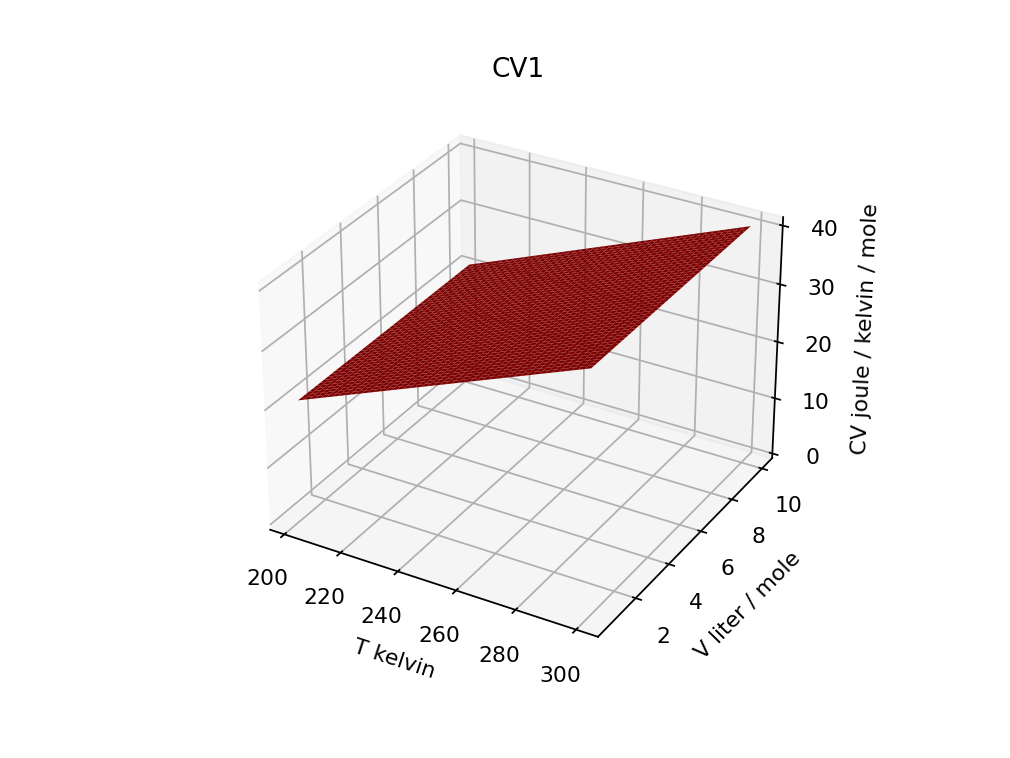

(0.0, 40.58091836734754)

In [5]:
# Plotting CV of the first grid, in red
llist = [xlabel,ylabel,'CV '+str(CV1.units)]
ax = PL.plot_surface1(Tgridnew, Vgridnew, CV1, color='red',title='CV1',labellist=llist) 
ax.set_zlim([0,max_all_three_CVs])

### Your turn
Do this again, but for $U_2$ and $U_3$. Scale the vertical axis to the same maximum as you did before.

<IPython.core.display.Javascript object>


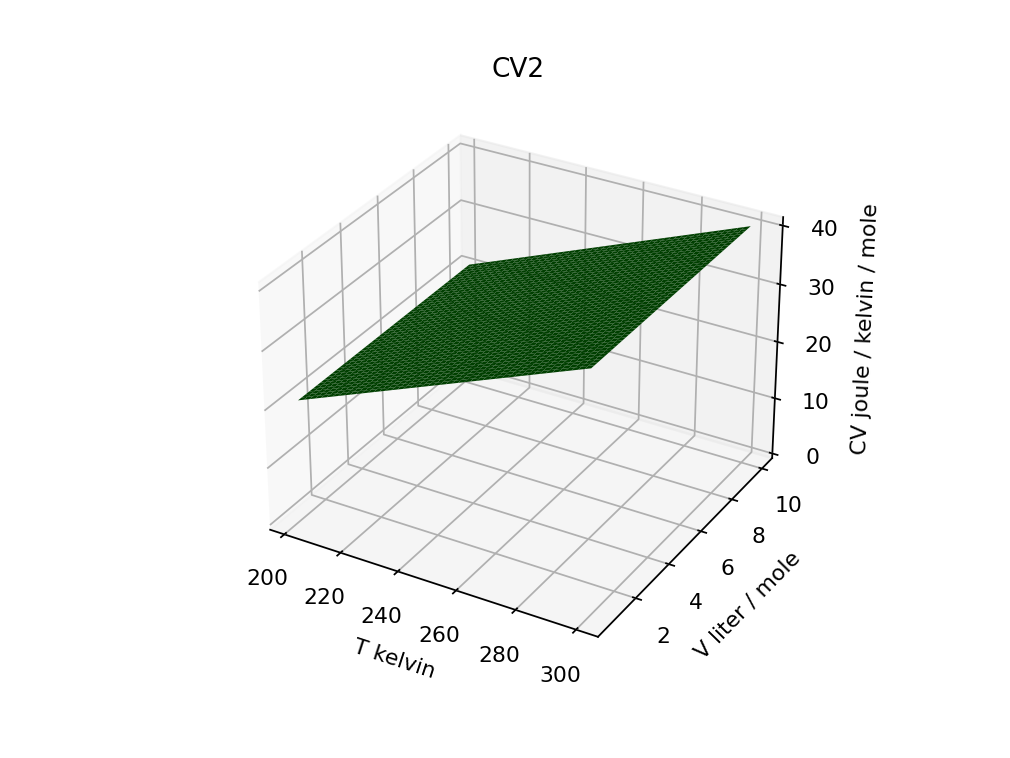

<IPython.core.display.Javascript object>


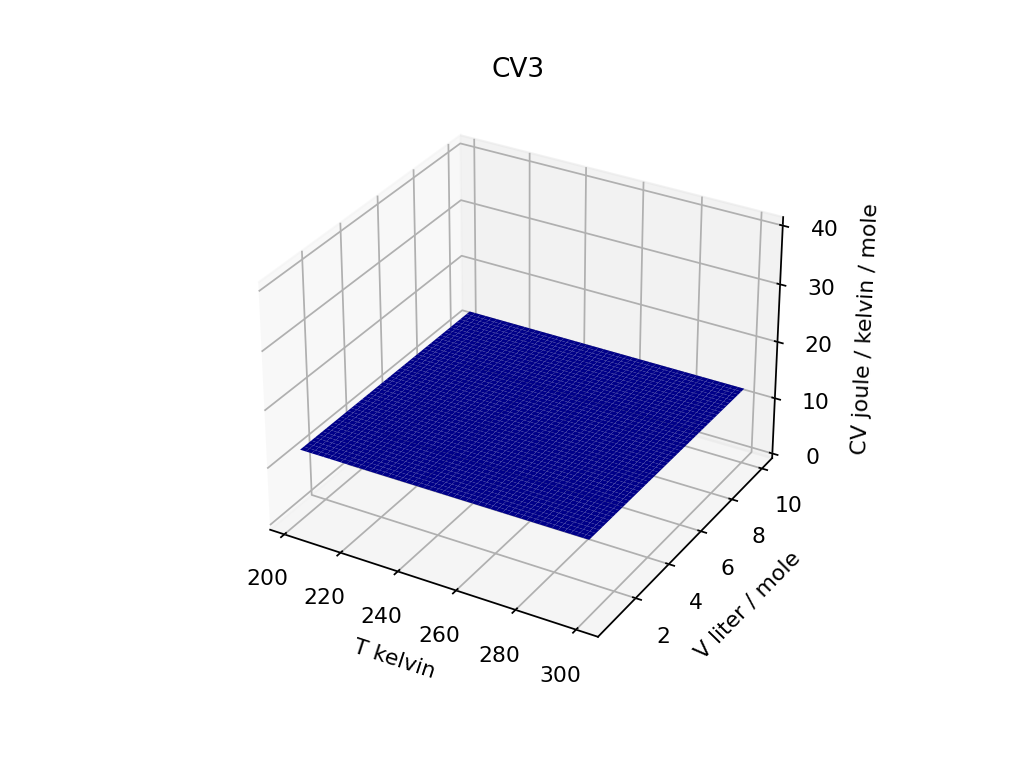

(0.0, 40.58091836734754)

In [6]:
# Plot CV of the second grid, in green
### BEGIN SOLUTION
ax = PL.plot_surface1(Tgridnew, Vgridnew, CV2, color='green',title='CV2',labellist=llist) 
ax.set_zlim([0,max_all_three_CVs])
### END SOLUTION

# Plot CV of the third grid, in blue
### BEGIN SOLUTION
ax = PL.plot_surface1(Tgridnew, Vgridnew, CV3, color='blue',title='CV3',labellist=llist) 
ax.set_zlim([0,max_all_three_CVs])
### END SOLUTION

### Pause for analysis
1. $C_V(T,V)$ is supposed to be flat (constant) for a monatomic ideal gas. For the gas that seems to be a monatomic ideal gas, approximately what is the value of $C_V$? 
1. For the two other gases -- presumed to be polyatomic gases -- $C_V(T,V)$ is supposed to be (generally) higher than that of a monatomic gas. Did that work out?

### BEGIN SOLUTION ###

1. Looks like about 12 J/mol/K
1. Yes, they're larger

### END SOLUTION ###

### Calculating $\pi_T$
In the cell below, calculate $\pi_T$ surfaces for the three internal energy grids. Some notes: 
1. A convenient naming convention could be piT1, piT2, and piT3 (but it's your choice).
1. Don't forget that this time we want the partial in the "y" direction, so use dF_dy.
1. It'll be handy to record the maximum $\pi_T$ value among all three, and to create an appropriate zlabel, for subsequent plotting.

In [7]:
# Calculate the partials of U with respect to V for the U1, U2, and U3
### BEGIN SOLUTION
Tgridnew, Vgridnew, piT1 = PL.dF_dy([Tgrid,Vgrid],Ugrid1)
Tgridnew, Vgridnew, piT2 = PL.dF_dy([Tgrid,Vgrid],Ugrid2)
Tgridnew, Vgridnew, piT3 = PL.dF_dy([Tgrid,Vgrid],Ugrid3)
### END SOLUTION

# Convert the pi_T values to bar
### BEGIN SOLUTION
piT1.ito('bar')
piT2.ito('bar')
piT3.ito('bar')
### END SOLUTION

# Get a sense of the max values for graphing
### BEGIN SOLUTION
max_all_three_piTs = np.max([piT1,piT2,piT3]); print('The maximum pi_T value is', max_all_three_piTs)
### END SOLUTION

Shape of partial derivative = (50, 49)
Shape of partial derivative = (50, 49)
Shape of partial derivative = (50, 49)
The maximum pi_T value is 5.764705882352965


### Visualizing $\pi_T$
In the cell below, plot all three $\pi_T$ surfaces, using a vertical scale based on the maximum of all three.

<IPython.core.display.Javascript object>


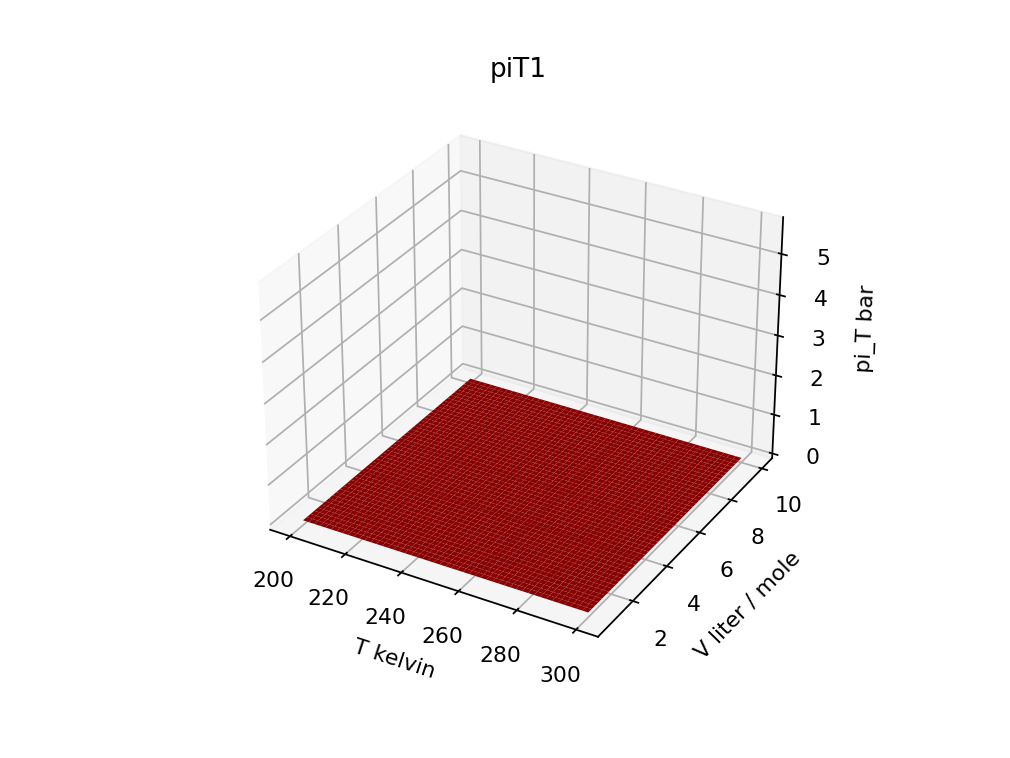

<IPython.core.display.Javascript object>


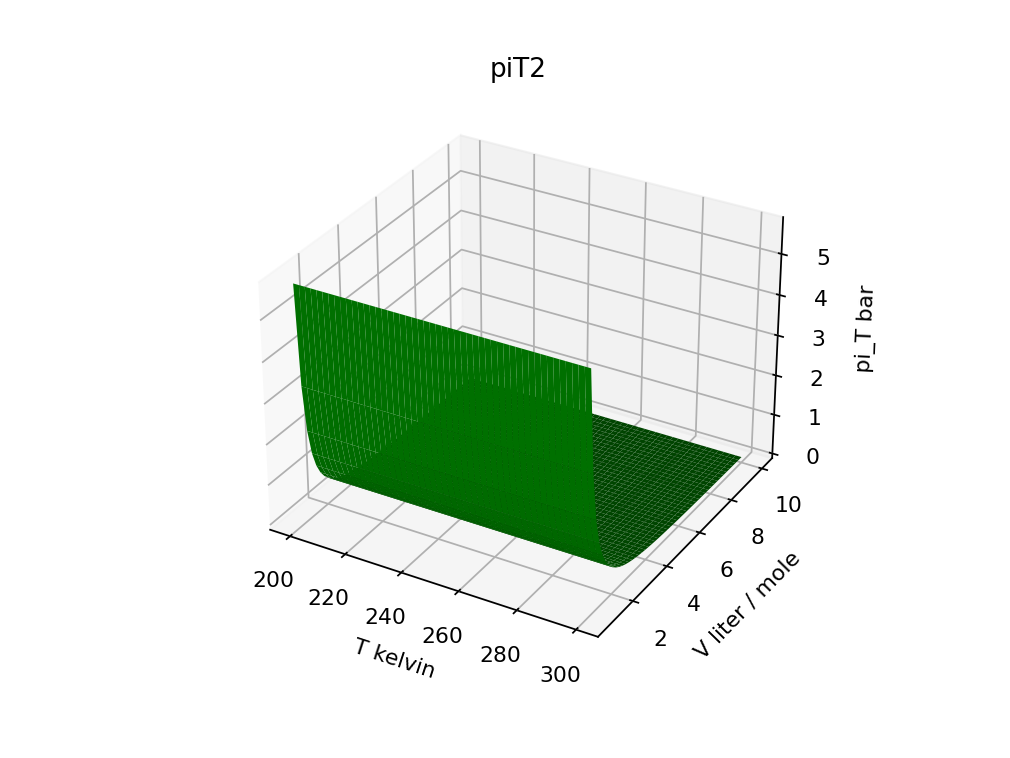

<IPython.core.display.Javascript object>


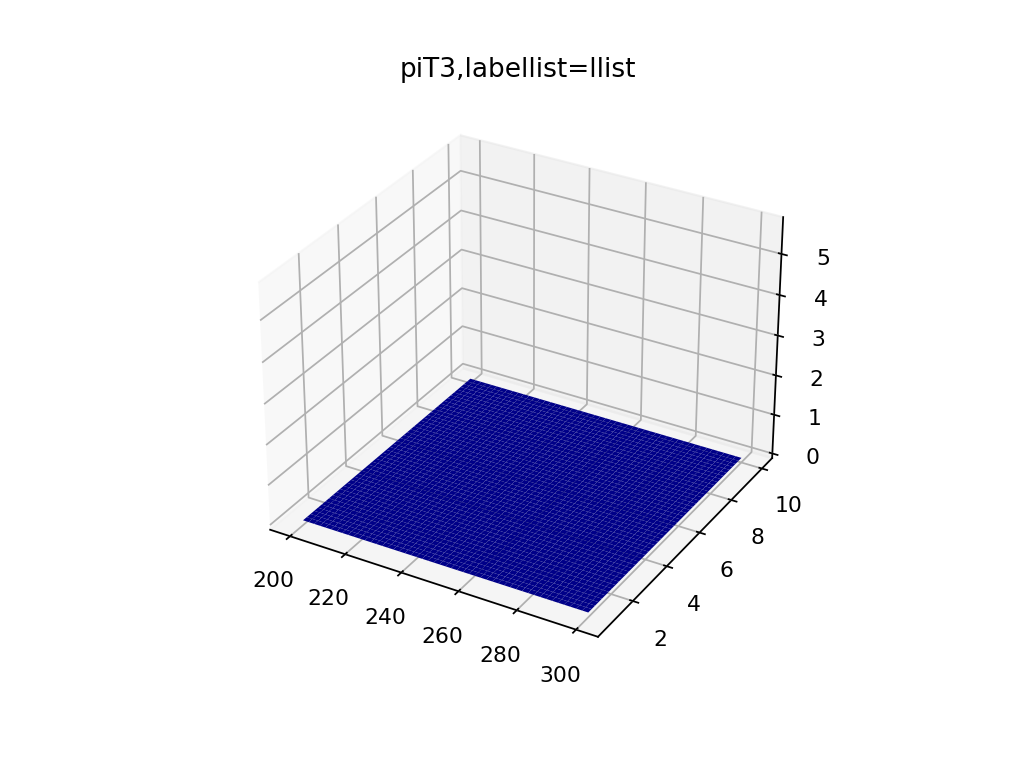

(0.0, 5.764705882352965)

In [8]:
# Prep the labels
llist = [xlabel,ylabel,'pi_T '+str(piT1.units)]

# Plot piT of the the first grid, in red
### BEGIN SOLUTION
ax = PL.plot_surface1(Tgridnew, Vgridnew, piT1, color='red', title='piT1',labellist=llist) 
ax.set_zlim([0,max_all_three_piTs])
### END SOLUTION

# Plot piT of the the second grid, in green
### BEGIN SOLUTION
ax = PL.plot_surface1(Tgridnew, Vgridnew, piT2, color='green',title='piT2',labellist=llist) 
ax.set_zlim([0,max_all_three_piTs])
### END SOLUTION

# Plot piT of the the third grid, in blue
### BEGIN SOLUTION
ax = PL.plot_surface1(Tgridnew, Vgridnew, piT3, color='blue',title='piT3,labellist=llist')
ax.set_zlim([0,max_all_three_piTs])
### END SOLUTION

### Pause for analysis
In the cell below, enter responses to these questions:
1. You will have noticed that one of these gases has a non-zero $\pi_T$. Is it positive or negative? Does it seem to depend more on temperature or on volume? 
1. It it turns out that pressure has dimensions energy/volume (who knew?). Given that, how does one conclude that the *units* of $\pi_T$ calculated here are Pascals? 

### BEGIN SOLUTION ###
1. It's positive, and it depends on volume (not at all on temperature, it seems).
1. Must be pascals.

### END SOLUTION ###

### Validating and finishing up
Assuming all this has gone smoothly and a Kernel/Restart & Run All has run without error, don't forget to
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page